<a href="https://colab.research.google.com/github/hugoalfedoputra-ub/ml/blob/main/colab/heart_attack_anal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Analysis and Prediction using NN

In [319]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns
sns.set_theme()

In [320]:
! wget https://raw.githubusercontent.com/hugoalfedoputra-ub/ml/main/datasets/heart_attack_analysis_and_prediction.xls?token=GHSAT0AAAAAACWRQPAVKGQKOFR43SDGEBNCZWQEHQA

--2024-08-29 09:33:52--  https://raw.githubusercontent.com/hugoalfedoputra-ub/ml/main/datasets/heart_attack_analysis_and_prediction.xls?token=GHSAT0AAAAAACWRQPAVKGQKOFR43SDGEBNCZWQEHQA
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-29 09:33:52 ERROR 404: Not Found.



In [321]:
data = pd.read_csv('/content/heart_attack_analysis_and_prediction.xls?token=GHSAT0AAAAAACWRQPAVKGQKOFR43SDGEBNCZWQEHQA')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [322]:
data.shape

(303, 14)

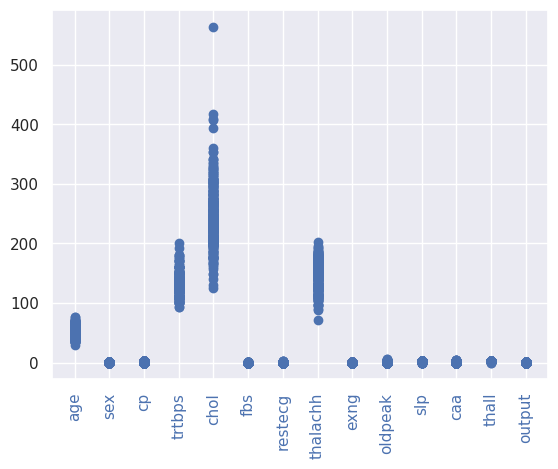

In [323]:
plt.grid(True)
plt.xticks(rotation='vertical', c='b')
plt.plot(data.T,'bo')
plt.show()

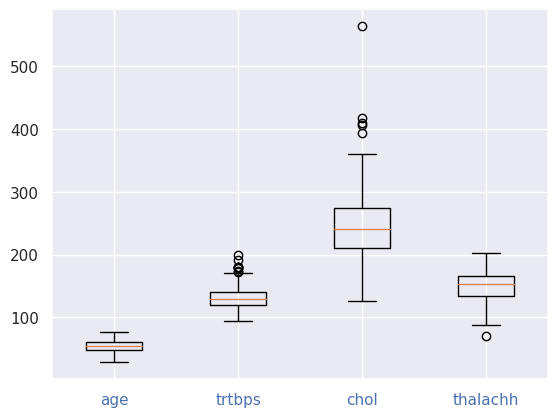

In [324]:
plt.xticks(c='b')
plt.boxplot(data[['age', 'trtbps', 'chol', 'thalachh']],labels=['age', 'trtbps', 'chol', 'thalachh'])
plt.show()

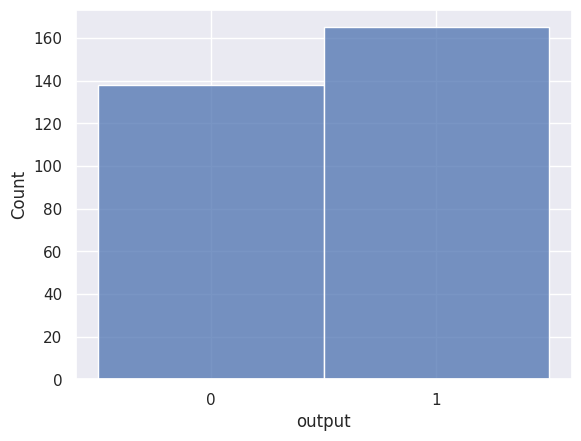

In [325]:
sns.histplot(data=data, x='output', discrete=True)
plt.xticks([0,1], ['0','1'])
plt.show()

## Declare train and test datasets

In [326]:
y=data['output']
y.head(5)

,output
0,1
1,1
2,1
3,1
4,1


In [327]:
x=data.drop('output', axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Using McCulloch-Pitts Neuron
### Binning data to 0 and 1 for MCP

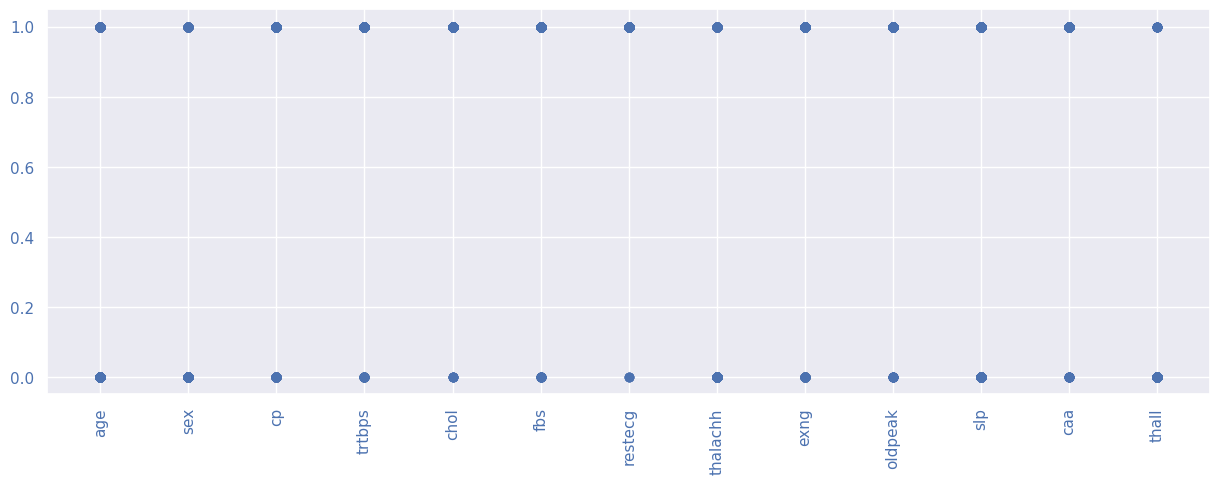

In [328]:
x_train_bin=x_train.apply(pd.cut,bins=2,labels=[1,0]).values
x_test_bin=x_test.apply(pd.cut,bins=2,labels=[1,0]).values

#Plotting data
plt.figure(figsize=(15,5))
plt.plot(x_train_bin.T,'bo')
plt.xticks(rotation='vertical',c='b',ticks=range(len(x_train.columns)),labels=x_train.columns)
plt.yticks(c='b')
plt.show()

In [329]:
class MCP:
  # Initialise the parameter value to 0
  def __init__(self):
    self.theta=0

  # Defining model
  def Model(self,x):
    # Assumption where all the weights are 1 and bias is 0
    return np.sum(np.dot(x,1)) >=self.theta

  # Find best b value
  def fit(self,x,y,theta_range=-1):
    # Store accuracies for different value of b
    accuracy={}

    if theta_range < 0:
      theta_range = x.shape[1]+1

    # Test the range of b from [0,n] where n is how many columns
    # in the training data
    for theta in range(theta_range):
        self.theta=theta
        yhat=[]
        # Calculate net of each row and passes it through step function
        for row in x:
            yhat.append(self.Model(row))
        accuracy[theta]=accuracy_score(yhat,y)

    # Finds best bias because all the weights are set to be 1
    best_theta=max(accuracy,key=accuracy.get)
    self.theta=best_theta
    return [accuracy,best_theta,accuracy[best_theta]]

  def predict(self,x,y):
    # Predict from test data with b value set from fitting
    yhat=[]
    for row in x:
        yhat.append(self.Model(row))
    accuracy=accuracy_score(y,yhat)
    return accuracy

Optimal value of b: 0
Accuracy of model on training data: 0.5495867768595041 



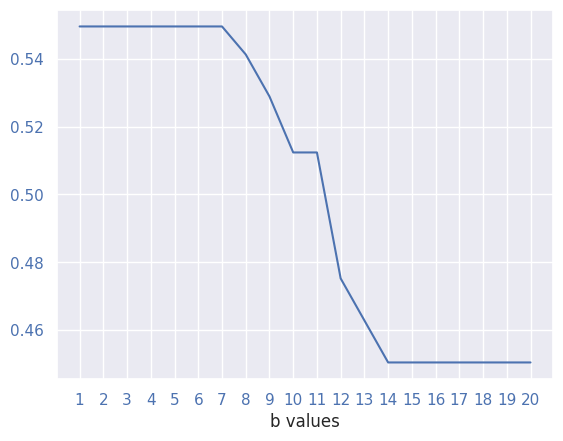

In [330]:
neuron=MCP()
accuracy,best_b,accuracy_model=neuron.fit(x_train_bin,y_train,20)
print('Optimal value of b:',best_b)
print('Accuracy of model on training data:',accuracy_model,'\n')

accuracies=list(accuracy.values())
plt.plot(accuracies)
plt.xticks(range(20),np.arange(1,21,1),c='b')
plt.yticks(c='b')
plt.xlabel('b values')
plt.show()

In [331]:
accuracy=neuron.predict(x_test_bin,y_test)
print("Model accuracy on test data:",accuracy)

Model accuracy on test data: 0.5245901639344263


## Using Hebb's Network
### Binning data to -1 and 1

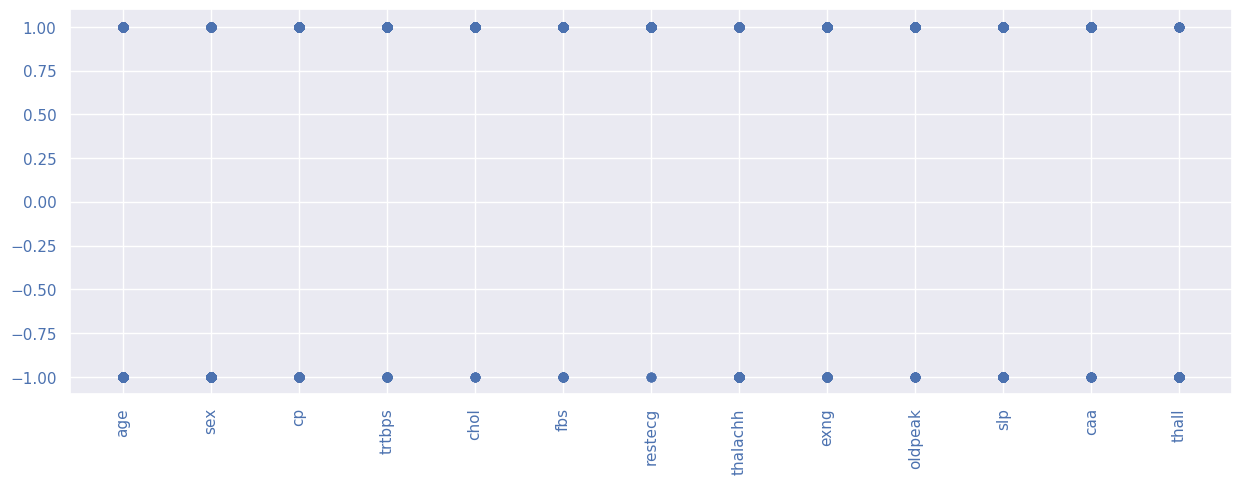

In [332]:
x_train_bin=x_train.apply(pd.cut,bins=2,labels=[1,-1]).values
x_test_bin=x_test.apply(pd.cut,bins=2,labels=[1,-1]).values

#Plotting data
plt.figure(figsize=(15,5))
plt.plot(x_train_bin.T,'bo')
plt.xticks(rotation='vertical',c='b',ticks=range(len(x_train.columns)),labels=x_train.columns)
plt.yticks(c='b')
plt.show()

In [333]:
print(type(x_train_bin))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [334]:
class Hebb:
  def __init__(self,n_cols):
    self.b=0
    self.w=[0 for _ in range(n_cols)]
    self.n_cols = n_cols

  def forward(self,x,thres=0):
    # Set threshold to be 0
    return np.sum(np.dot(x,self.w)) + self.b >= thres

  def fit(self,x,y):
    print(self.w, self.b)
    for i in range(len(x)):
      for j in range(self.n_cols):
        self.w[j] = self.w[j] + x[i][j]*y.iloc[i]
      self.b = self.b + y.iloc[i]
    print(self.w, self.b)

  def predict(self,x,y,n_thres=50):
    accuracies = []
    for thres in range(n_thres):
      yhat=[]
      for row in x:
        yhat.append(self.forward(row,thres))
      accuracies.append(accuracy_score(y,yhat))
    return accuracies

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 0
[9, -7, -5, 95, 123, 99, 131, -75, 99, 131, -41, 121, -123] 133


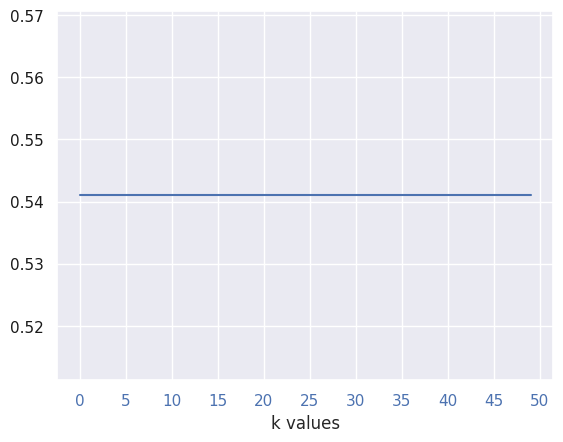

In [338]:
hebb = Hebb(x_train_bin.shape[1])
hebb.fit(x_train_bin, y_train)
accuracies = hebb.predict(x_test_bin, y_test)

plt.plot(accuracies)
plt.xticks(range(0,51,5),np.arange(0,51,5),c='b')
plt.yticks(c='k')
plt.xlabel('k values')
plt.show()

## Using KNN (euclidean) as reference

Best accuracy with KNN: 0.7540983606557377 



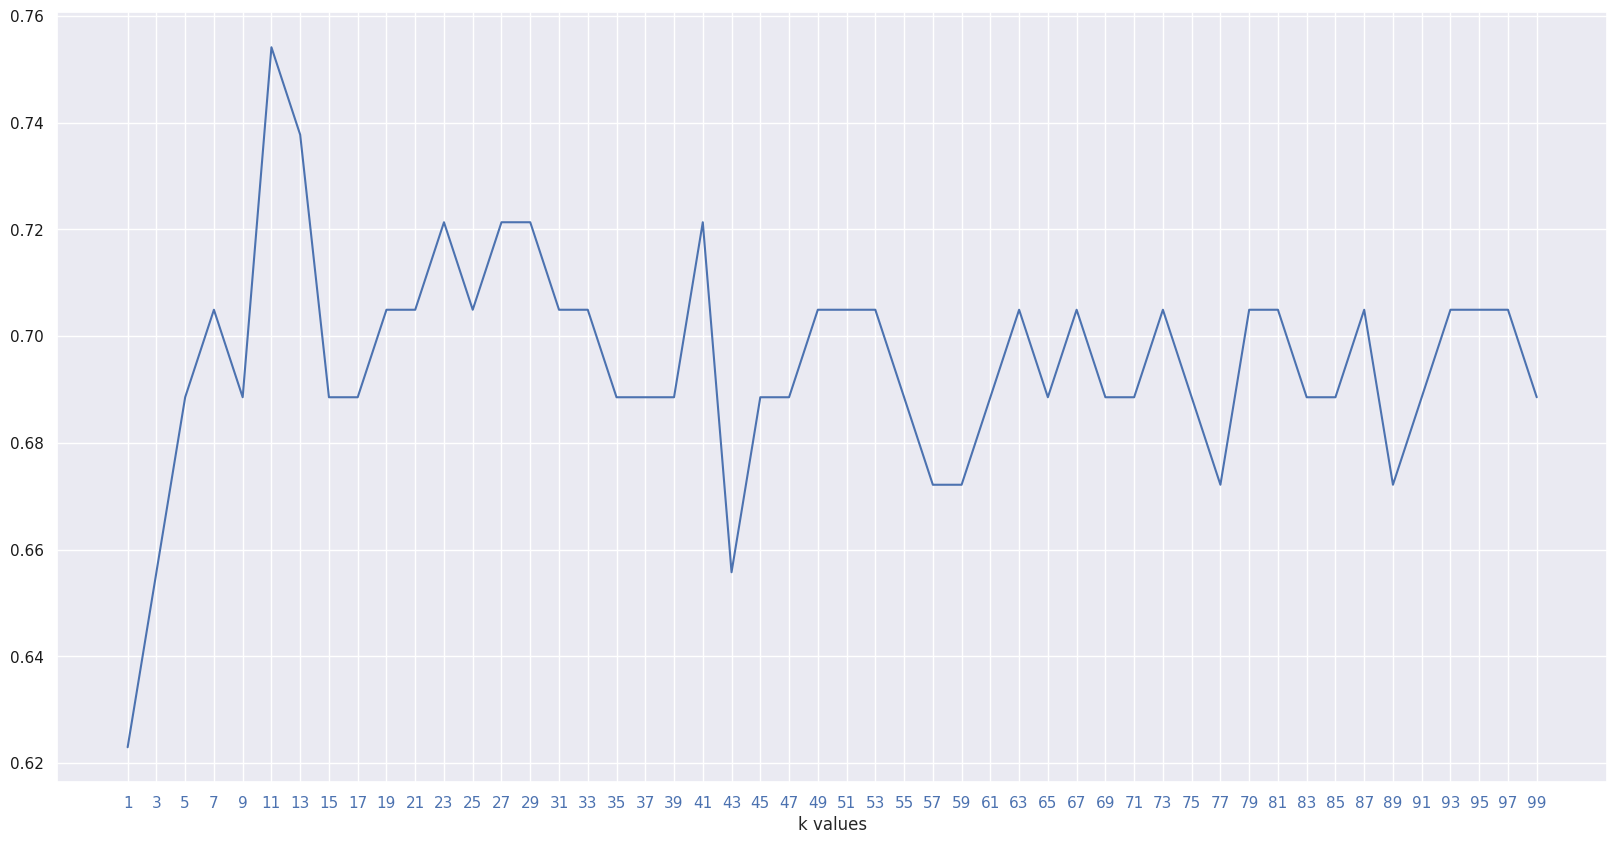

In [346]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for i in range(1,101,2):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train, y_train)
  accuracies.append(accuracy_score(y_test, neigh.predict(x_test)))

print('Best accuracy with KNN:', max(accuracies), '\n')

plt.figure(figsize=(20,10))
plt.plot(accuracies)
plt.xticks(range(0,50),np.arange(1,101,2),c='b')
plt.yticks(c='k')
plt.xlabel('k values')
plt.show()